# Initialisation

In [2]:
import h2o
h2o.init(port = 54444)

Checking whether there is an H2O instance running at http://localhost:54444..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_242"; OpenJDK Runtime Environment (build 1.8.0_242-b08); OpenJDK 64-Bit Server VM (build 25.242-b08, mixed mode)
  Starting server from /work/jupyterhub/id860112/envs/My_Python_3.5/h2o_jar/h2o.jar
  Ice root: /tmp/tmpacs4xcs8
  JVM stdout: /tmp/tmpacs4xcs8/h2o_id860112_started_from_python.out
  JVM stderr: /tmp/tmpacs4xcs8/h2o_id860112_started_from_python.err
  Server is running at http://127.0.0.1:54446
Connecting to H2O server at http://127.0.0.1:54446... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Brussels
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,"2 years, 1 month and 1 day !!!"
H2O cluster name:,H2O_from_python_id860112_02e3it
H2O cluster total nodes:,1
H2O cluster free memory:,26.67 Gb
H2O cluster total cores:,40
H2O cluster allowed cores:,40
H2O cluster status:,"accepting new members, healthy"


In [3]:
df = h2o.import_file(path="Data/data.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


# Data prep

In [4]:
for col in ["Type 1", "Type 2", "Generation", "Legendary"]:
    df[col] = df[col].asfactor() #also .asnumeric()

In [6]:
df.summary()

,num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
type,int,string,enum,enum,int,int,int,int,int,int,int,enum,enum
mins,1.0,NaN,,,180.0,1.0,5.0,5.0,10.0,20.0,5.0,,
mean,362.8137500000003,NaN,,,435.10249999999957,69.25875,79.00125,73.84250000000004,72.82000000000008,71.9025,68.2775,,
maxs,721.0,NaN,,,780.0,255.0,190.0,230.0,194.0,230.0,180.0,,
sigma,208.34379756406656,NaN,,,119.96303975551906,25.53466903233208,32.45736586949845,31.183500559332924,32.7222941688016,27.82891579711746,29.060473717161447,,
zeros,0,0,,,0,0,0,0,0,0,0,,
missing,0,0,0,386,0,0,0,0,0,0,0,0,0
0,1.0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1,False
1,2.0,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1,False
2,3.0,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1,False


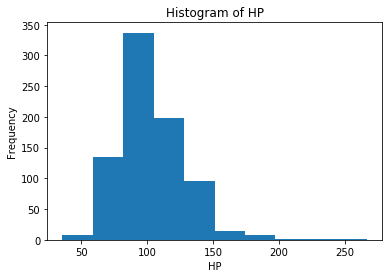

In [10]:
df[:,"HP"].hist()

In [13]:
df[:, "Type 1"].grep(("Fire"))

C1
4
5
6
7
8
42
43
63
64
83


In [16]:
df[:,["HP", "Attack", "Defense", "Speed", "Total"]].cor(na_rm = False)

HP,Attack,Defense,Speed,Total
1,0.422386,0.239622,0.175952,0.618748
0.422386,1,0.438687,0.38124,0.736211
0.239622,0.438687,1,0.0152266,0.612787
0.175952,0.38124,0.0152266,1,0.575943
0.618748,0.736211,0.612787,0.575943,1


In [19]:
df.group_by("Generation").count().get_frame()

Generation,nrow
1,166
2,106
3,160
4,121
5,165
6,82


In [35]:
# df.columns = column_names

In [3]:
df.head()

num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
7,Squirtle,Water,,314,44,48,65,50,64,43,1,False


# Modeling

In [5]:
train, valid, test = df.split_frame([0.8, 0.1], destination_frames=["train", "valid", "test"])

x = ["HP", "Attack", "Generation", "Defense", "Speed"]
y = "Legendary"

In [8]:
train.summary()

,num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
type,int,string,enum,enum,int,int,int,int,int,int,int,int,enum
mins,1.0,NaN,,,180.0,1.0,5.0,5.0,10.0,20.0,5.0,1.0,
mean,363.8196994991653,NaN,,,432.32387312186967,69.09015025041742,78.56761268781312,73.14190317195333,72.0050083472454,71.18363939899845,68.3355592654423,3.3405676126878117,
maxs,720.0,NaN,,,780.0,255.0,180.0,230.0,194.0,230.0,180.0,6.0,
sigma,209.25182268477258,NaN,,,118.40519942917827,24.95089263510274,31.248090555340433,31.44265200223657,32.25766313702535,28.380000249425205,28.86271137655118,1.6773746243622276,
zeros,0,0,,,0,0,0,0,0,0,0,0,
missing,0,0,0,287,0,0,0,0,0,0,0,0,0
0,1.0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False
1,2.0,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False
2,3.0,VenusaurMega Venusaur,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False


In [46]:
train.nrows

629

In [47]:
test.nrows

82

## Algorithms

### Random forest

In [54]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

rfr = H2ORandomForestEstimator(validation_frame=valid)
rfr.train(["HP", "Attack", "Generation", "Defense", "Speed"], "Legendary", train)

print(rfr.auc(train=True))
print(rfr.auc(valid=True))
print(rfr.model_performance(test).auc())

drf Model Build progress: |███████████████████████████████████████████████| 100%
0.9289432789432789
0.9601265822784809
0.9801536491677337


Cross validation

In [58]:
rfr = H2ORandomForestEstimator(nfolds = 5)
rfr.train(["HP", "Attack", "Generation", "Defense", "Speed"], "Legendary", train)

print(rfr.auc(train=True))
print(rfr.auc(xval=True))
print(rfr.model_performance(test).auc())

drf Model Build progress: |███████████████████████████████████████████████| 100%
0.9360722610722612
0.9264957264957265
0.9884763124199745


### GBM

In [8]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

gbm = H2OGradientBoostingEstimator()
gbm.train(["HP", "Attack", "Generation", "Defense", "Speed"], "Legendary", train)

gbm

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1586269726676_35


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.005146594623134377
RMSE: 0.07173977016365732
LogLoss: 0.030153934823480767
Mean Per-Class Error: 0.0
AUC: 1.0
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5027017861271871: 


,False,True,Error,Rate
False,592.0,0.0,0.0,(0.0/592.0)
True,0.0,51.0,0.0,(0.0/51.0)
Total,592.0,51.0,0.0,(0.0/643.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5027018,1.0,48.0
max f2,0.5027018,1.0,48.0
max f0point5,0.5027018,1.0,48.0
max accuracy,0.5027018,1.0,48.0
max precision,0.9641096,1.0,0.0
max recall,0.5027018,1.0,48.0
max specificity,0.9641096,1.0,0.0
max absolute_mcc,0.5027018,1.0,48.0
max min_per_class_accuracy,0.5027018,1.0,48.0
max mean_per_class_accuracy,0.5027018,1.0,48.0


Gains/Lift Table: Avg response rate:  7.93 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0108865,0.9393503,12.6078431,12.6078431,1.0,1.0,0.1372549,0.1372549,1160.7843137,1160.7843137
,2,0.0202177,0.9257748,12.6078431,12.6078431,1.0,1.0,0.1176471,0.2549020,1160.7843137,1160.7843137
,3,0.0311042,0.8813565,12.6078431,12.6078431,1.0,1.0,0.1372549,0.3921569,1160.7843137,1160.7843137
,4,0.0404355,0.8542370,12.6078431,12.6078431,1.0,1.0,0.1176471,0.5098039,1160.7843137,1160.7843137
,5,0.0513219,0.8033854,12.6078431,12.6078431,1.0,1.0,0.1372549,0.6470588,1160.7843137,1160.7843137
,6,0.1010886,0.1116326,7.0919118,9.8923077,0.5625,0.7846154,0.3529412,1.0,609.1911765,889.2307692
,7,0.1508554,0.0422089,0.0,6.6288660,0.0,0.5257732,0.0,1.0,-100.0,562.8865979
,8,0.2006221,0.0229983,0.0,4.9844961,0.0,0.3953488,0.0,1.0,-100.0,398.4496124
,9,0.3001555,0.0077022,0.0,3.3316062,0.0,0.2642487,0.0,1.0,-100.0,233.1606218
,10,0.3996890,0.0040506,0.0,2.5019455,0.0,0.1984436,0.0,1.0,-100.0,150.1945525



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2020-04-07 16:42:20,0.013 sec,0.0,0.2702309,0.2770949,0.5,1.0,0.9206843
,2020-04-07 16:42:20,0.285 sec,1.0,0.2535748,0.2324934,0.9660672,10.6681750,0.0590980
,2020-04-07 16:42:20,0.348 sec,2.0,0.2391154,0.2047508,0.9775768,12.6078431,0.0404355
,2020-04-07 16:42:20,0.390 sec,3.0,0.2275732,0.1854011,0.9845158,12.6078431,0.0419907
,2020-04-07 16:42:20,0.402 sec,4.0,0.2163007,0.1694560,0.9874139,12.6078431,0.0388802
---,---,---,---,---,---,---,---,---
,2020-04-07 16:42:21,0.849 sec,46.0,0.0761266,0.0324267,0.9999669,12.6078431,0.0015552
,2020-04-07 16:42:21,0.859 sec,47.0,0.0752776,0.0320331,0.9999669,12.6078431,0.0015552
,2020-04-07 16:42:21,0.870 sec,48.0,0.0739905,0.0310781,0.9999669,12.6078431,0.0015552
,2020-04-07 16:42:21,0.879 sec,49.0,0.0725827,0.0304893,1.0,12.6078431,0.0



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Speed,60.4376602,1.0,0.3571149
HP,45.1313744,0.7467426,0.2666729
Defense,23.1917744,0.3837305,0.1370359
Attack,23.0916157,0.3820733,0.1364441
Generation,17.3862782,0.2876729,0.1027323


In [40]:
gbm.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.034715703892221596
RMSE: 0.1863215067892636
LogLoss: 0.12712177446035774
Mean Per-Class Error: 0.08926553672316384
AUC: 0.9570621468926555
Gini: 0.9141242937853109
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39288287205709105: 


,False,True,Error,Rate
False,175.0,2.0,0.0113,(2.0/177.0)
True,4.0,11.0,0.2667,(4.0/15.0)
Total,179.0,13.0,0.0312,(6.0/192.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3928829,0.7857143,12.0
max f2,0.1540927,0.8024691,20.0
max f0point5,0.3928829,0.8208955,12.0
max accuracy,0.3928829,0.96875,12.0
max precision,0.9232458,1.0,0.0
max recall,0.0047607,1.0,77.0
max specificity,0.9232458,1.0,0.0
max absolute_mcc,0.3928829,0.7712438,12.0
max min_per_class_accuracy,0.1540927,0.8666667,20.0
max mean_per_class_accuracy,0.1540927,0.9107345,20.0


Gains/Lift Table: Avg response rate:  7.81 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.8919604,6.4,6.4,0.5,0.5,0.0666667,0.0666667,540.0,540.0
,2,0.0208333,0.7489008,12.8,9.6,1.0,0.75,0.1333333,0.2,1180.0,860.0
,3,0.03125,0.6483698,12.8,10.6666667,1.0,0.8333333,0.1333333,0.3333333,1180.0,966.6666667
,4,0.0416667,0.5201025,12.8,11.2,1.0,0.875,0.1333333,0.4666667,1180.0,1020.0000000
,5,0.0520833,0.4776227,6.4,10.24,0.5,0.8,0.0666667,0.5333333,540.0,924.0
,6,0.1041667,0.1682843,5.12,7.68,0.4,0.6,0.2666667,0.8,412.0,668.0
,7,0.1510417,0.0590645,1.4222222,5.7379310,0.1111111,0.4482759,0.0666667,0.8666667,42.2222222,473.7931034
,8,0.203125,0.0331028,1.28,4.5948718,0.1,0.3589744,0.0666667,0.9333333,28.0000000,359.4871795
,9,0.3020833,0.0093240,0.0,3.0896552,0.0,0.2413793,0.0,0.9333333,-100.0,208.9655172
,10,0.4010417,0.0048126,0.0,2.3272727,0.0,0.1818182,0.0,0.9333333,-100.0,132.7272727


### GLM

In [6]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

model = H2OGeneralizedLinearEstimator(family = "binomial", nfolds=10)
model.train(x, y, train)

model.model_performance(test)

glm Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.0708908987537634
RMSE: 0.2662534483415443
LogLoss: 0.22358176729827112
Null degrees of freedom: 79
Residual degrees of freedom: 69
Null deviance: 62.255714339771835
Residual deviance: 35.773082767723366
AIC: 57.773082767723366
AUC: 0.937142857142857
Gini: 0.8742857142857141
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32729252497547445: 


,False,True,Error,Rate
False,64.0,6.0,0.0857,(6.0/70.0)
True,2.0,8.0,0.2,(2.0/10.0)
Total,66.0,14.0,0.1,(8.0/80.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3272925,0.6666667,13.0
max f2,0.1967130,0.8196721,20.0
max f0point5,0.6741065,0.7142857,7.0
max accuracy,0.6741065,0.925,7.0
max precision,0.6741065,0.75,7.0
max recall,0.1967130,1.0,20.0
max specificity,0.9518207,0.9857143,0.0
max absolute_mcc,0.1967130,0.6335302,20.0
max min_per_class_accuracy,0.2069132,0.8714286,17.0
max mean_per_class_accuracy,0.1967130,0.9214286,20.0


Gains/Lift Table: Avg response rate: 12.50 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0125,0.9307394,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,-100.0
,2,0.025,0.8860102,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,-100.0
,3,0.0375,0.8378724,8.0,2.6666667,1.0,0.3333333,0.1,0.1,700.0,166.6666667
,4,0.05,0.7966541,8.0,4.0,1.0,0.5,0.1,0.2,700.0,300.0
,5,0.05,0.7596459,0.0,4.0,0.0,0.5,0.0,0.2,-100.0,300.0
,6,0.1,0.6545243,8.0,6.0,1.0,0.75,0.4,0.6,700.0,500.0
,7,0.15,0.3392904,0.0,4.0,0.0,0.5,0.0,0.6,-100.0,300.0
,8,0.2,0.2449014,4.0,4.0,0.5,0.5,0.2,0.8,300.0,300.0
,9,0.3,0.0839826,2.0,3.3333333,0.25,0.4166667,0.2,1.0,100.0,233.3333333
,10,0.4,0.0199831,0.0,2.5,0.0,0.3125,0.0,1.0,-100.0,150.0


In [7]:
plt.bar(x = list(model.coef().keys()), height = list(model.coef().values()))

NameError: name 'plt' is not defined

### AutoML

In [11]:
from h2o.automl import H2OAutoML

model = H2OAutoML(max_runtime_secs=30)
model.train(["HP", "Attack"], "Legendary", train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
model.leaderboard

model_id,auc,logloss
StackedEnsemble_BestOfFamily_0_AutoML_20190611_170412,0.941902,0.180794
StackedEnsemble_AllModels_0_AutoML_20190611_170412,0.938713,0.172195
GBM_grid_0_AutoML_20190611_170412_model_1,0.932957,0.164383
GBM_grid_0_AutoML_20190611_170412_model_10,0.92895,0.220419
GBM_grid_0_AutoML_20190611_170412_model_12,0.928837,0.169643
GBM_grid_0_AutoML_20190611_170412_model_0,0.928753,0.170714
GBM_grid_0_AutoML_20190611_170412_model_2,0.928414,0.167827
GBM_grid_0_AutoML_20190611_170412_model_3,0.925564,0.169165
GBM_grid_0_AutoML_20190611_170412_model_5,0.91614,0.236071
GBM_grid_0_AutoML_20190611_170412_model_6,0.916112,0.229941


In [17]:
model.leader.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,False,True
False,0.974855,0.0251451
False,0.886444,0.113556
False,0.982297,0.0177033
True,0.487312,0.512688
False,0.982306,0.0176937
False,0.978049,0.0219507
False,0.964805,0.0351954
False,0.982283,0.0177165
False,0.982299,0.017701
False,0.982251,0.0177495


In [18]:
model.leader.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.06395729450682401
RMSE: 0.25289779458671446
LogLoss: 0.2184567212126235
Null degrees of freedom: 200
Residual degrees of freedom: 197
Null deviance: 126.12987921557513
Residual deviance: 87.81960192747465
AIC: 95.81960192747465
AUC: 0.913823019086177
Gini: 0.827646038172354
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6243402079717024: 


,False,True,Error,Rate
False,175.0,7.0,0.0385,(7.0/182.0)
True,7.0,12.0,0.3684,(7.0/19.0)
Total,182.0,19.0,0.0697,(14.0/201.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6243402,0.6315789,16.0
max f2,0.1745500,0.6880734,29.0
max f0point5,0.6751327,0.6626506,13.0
max accuracy,0.6751327,0.9353234,13.0
max precision,0.9597394,1.0,0.0
max recall,0.0235799,1.0,77.0
max specificity,0.9597394,1.0,0.0
max absolute_mcc,0.6751327,0.5960632,13.0
max min_per_class_accuracy,0.0755508,0.8421053,37.0
max mean_per_class_accuracy,0.0755508,0.8468768,37.0


Gains/Lift Table: Avg response rate:  9.45 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0149254,0.9357356,10.5789474,10.5789474,1.0,1.0,0.1578947,0.1578947,957.8947368,957.8947368
,2,0.0248756,0.9267646,5.2894737,8.4631579,0.5,0.8,0.0526316,0.2105263,428.9473684,746.3157895
,3,0.0348259,0.8973216,0.0,6.0451128,0.0,0.5714286,0.0,0.2105263,-100.0,504.5112782
,4,0.0447761,0.8395223,10.5789474,7.0526316,1.0,0.6666667,0.1052632,0.3157895,957.8947368,605.2631579
,5,0.0597015,0.7998649,3.5263158,6.1710526,0.3333333,0.5833333,0.0526316,0.3684211,252.6315789,517.1052632
,6,0.1044776,0.5350533,5.8771930,6.0451128,0.5555556,0.5714286,0.2631579,0.6315789,487.7192982,504.5112782
,7,0.1542289,0.2163868,1.0578947,4.4363328,0.1,0.4193548,0.0526316,0.6842105,5.7894737,343.6332767
,8,0.2089552,0.0760014,1.9234450,3.7781955,0.1818182,0.3571429,0.1052632,0.7894737,92.3444976,277.8195489
,9,0.3034826,0.0411667,1.1135734,2.9482312,0.1052632,0.2786885,0.1052632,0.8947368,11.3573407,194.8231234
,10,0.4029851,0.0267619,0.0,2.2202729,0.0,0.2098765,0.0,0.8947368,-100.0,122.0272904


### KMeans

In [37]:
from h2o.estimators.kmeans import H2OKMeansEstimator

results = [H2OKMeansEstimator(k=clusters, init="Random", seed=2, standardize=True) for clusters in range(2,13)]
for estimator in results:
    estimator.train(x=df.col_names[5:-1], training_frame = df)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [38]:
clusters = 4
predicted = results[clusters-2].predict(df)
df["Predicted"] = predicted["predict"].asfactor()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


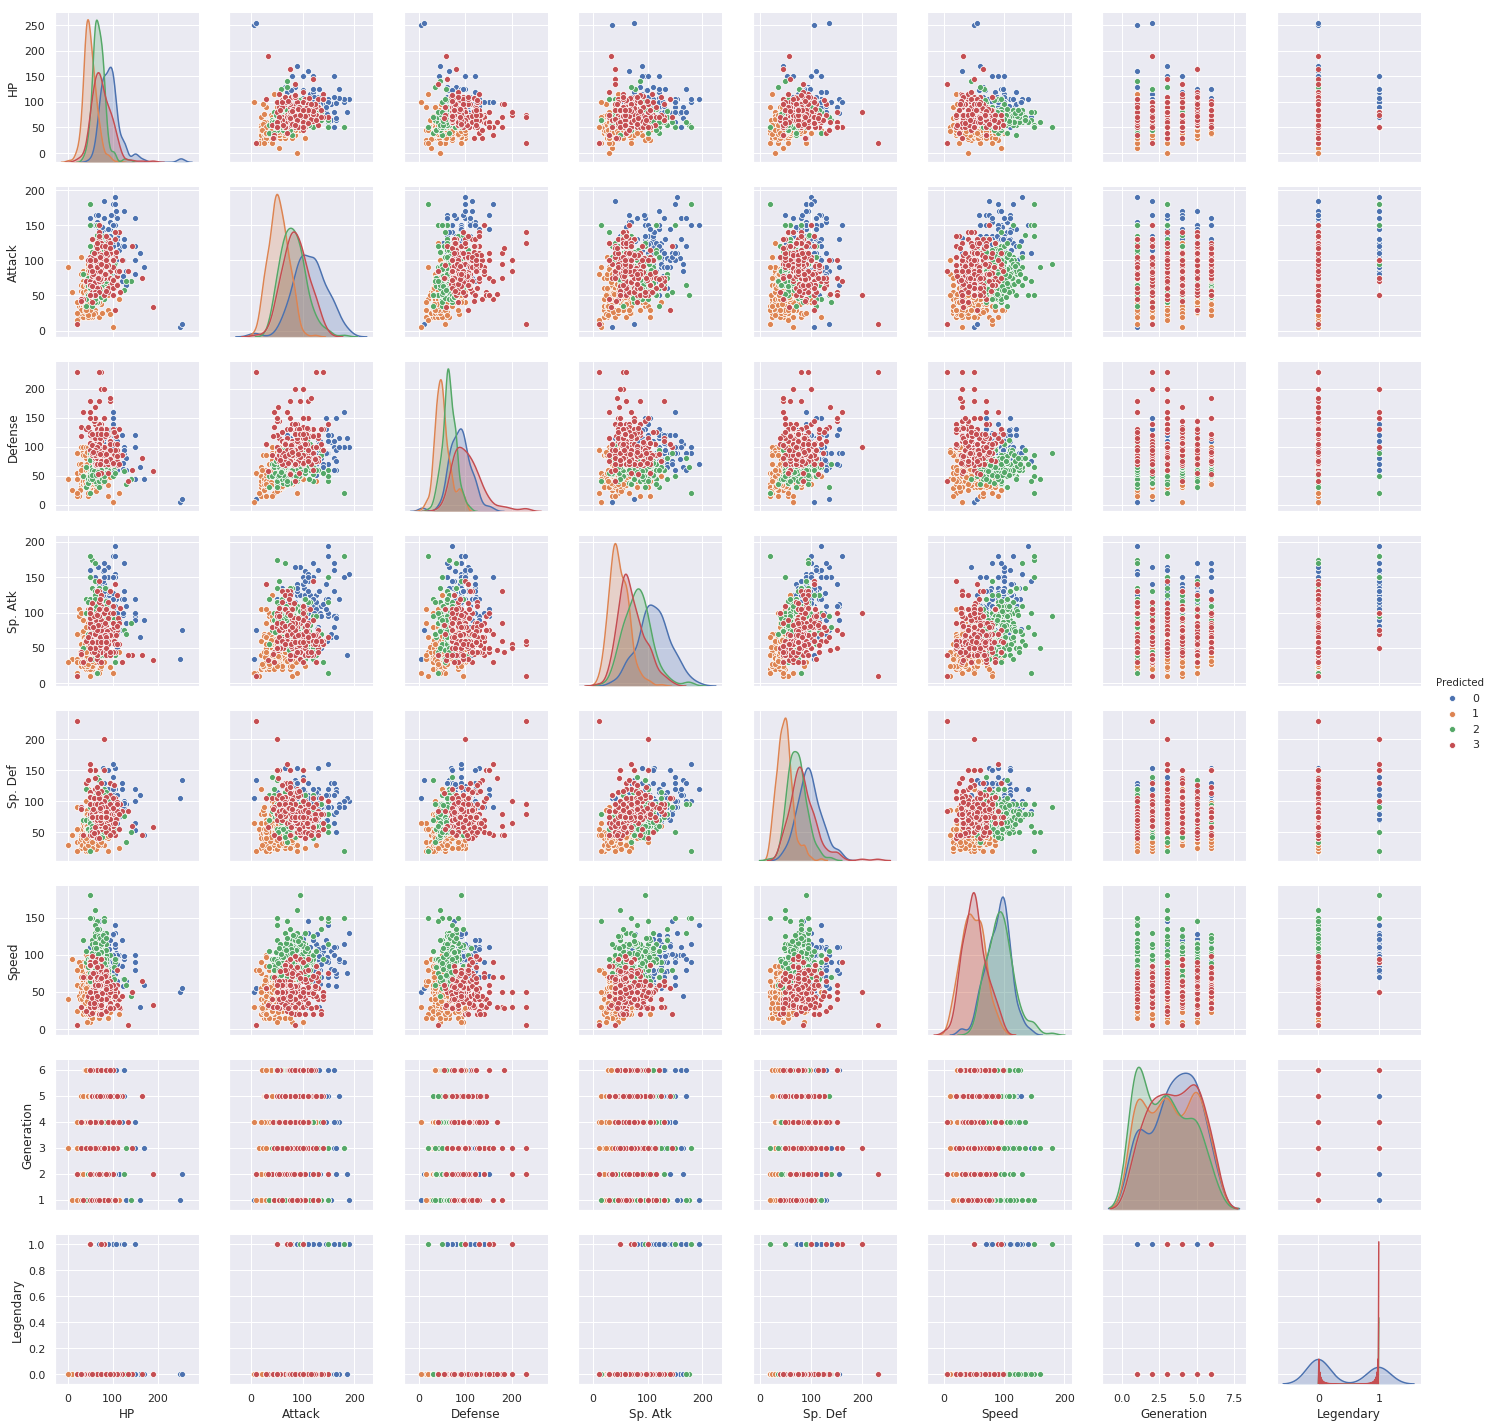

In [39]:
import seaborn as sns
%matplotlib inline
sns.set()
sns.pairplot(df.as_data_frame(True), vars=df.col_names[5:-1],  hue="Predicted");

## Gridsearch

In [19]:
# Baseline model
from h2o.estimators.gbm import H2OGradientBoostingEstimator

baseline = H2OGradientBoostingEstimator()

baseline.train(x, y, train)

baseline_perf = baseline.model_performance(test)
baseline_perf.logloss()

gbm Model Build progress: |███████████████████████████████████████████████| 100%


0.27592577556261

In [25]:

from h2o.grid.grid_search import H2OGridSearch

# GBM hyperparameters
gbm_params = {'learn_rate': [i * 0.05 for i in range(1, 6)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)],
                'ntrees': [i * 20 for i in range(1, 21)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 
                   'max_models': 10, 
                   'max_runtime_secs': 600,
                   'seed': 42}

# Train and validate a random grid of GBMs
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='random10', # so that next runs adds up to the same result table
                          hyper_params=gbm_params,
                          search_criteria=search_criteria)
gbm_grid.train(x=x, y=y,
                training_frame=train,
                nfolds=3)

# Get the grid results, sorted by validation AUC
gbm_gridperf = gbm_grid.get_grid(sort_by='auc', decreasing=True)
display(gbm_gridperf)

# Grab the top GBM model, chosen by validation AUC
best_gbm = gbm_gridperf.models[0]

# Now let's evaluate the model performance on a test set
best_gbm_perf = best_gbm.model_performance(test)

print(best_gbm_perf.logloss())

with open("gridsearch_result.txt", "w") as f:
    f.write("AUC on training set = {} \n".format(best_gbm.auc()))
    f.write("AUC on test set = {} \n".format(best_gbm_perf.auc()))
    f.write("Best model parameters : \n")
    f.write(str(best_gbm.params))

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
    col_sample_rate learn_rate max_depth ntrees         sample_rate  \
0               0.4       0.05        10    340  0.7000000000000001   
1               0.1        0.1         6    200  0.6000000000000001   
2               0.8        0.1         5    320                 1.0   
3               0.5        0.2         6    320                 0.8   
4               0.4       0.25         5    380  0.6000000000000001   
5               0.4       0.25         8    340                 0.9   
6               0.4        0.1         9    120                 0.8   
7               0.1        0.2         6     40                 0.8   
8               0.1       0.25         7     60  0.6000000000000001   
9               0.8       0.25         4     40  0.7000000000000001   

          model_ids                 auc  
0  random10_model_0   0.960684949655538  
1  random10_model_4  0.9537294647588765  
2  random10

0.4041285182431711


In [ ]:
h2o.cluster().shutdown()